# Z-test와 T_test

집단 내, 집단 간 평균 값 차이가 통계적으로 유의미한지 알아내는 방법

단일 표본 집단의 평균 변화를 분석하거나 두 집단의 평균 값, 비율 차이를 분석할 떄 사용한다.

z_test,t_test의 조건 : 양적 변수, 정규 분포, 등분산성


## Z-Test

조건 : 1) 모 집단의 분산을 알 수 있는 경우 (가정) 2)
표본 크기가 30 이상


In [1]:
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/golf-ball-testing
df = pd.read_csv("datasets/Golf_test.csv")

# 골프공 테스팅 데이터 셋

# 데이터 샘플 확인
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [3]:
# 골프공 타입별 통계값 확인

df.describe()

# 50개의 관측치가 있어서 z-test, t-test 모두 가능. 평균값이 270 내외, before보다 after가 큰 경향 , A -> C -> B 순으로 평균값이 크다. 

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


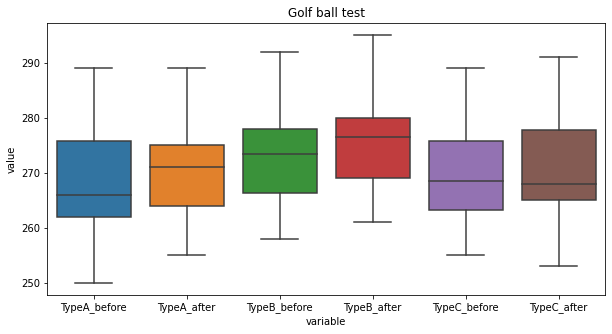

In [4]:
# 그룹별 박스 플롯 기각화

df2 = pd.melt(df)
plt.figure(figsize=(10,5))
sb.boxplot(x='variable',y='value',data=df2)
plt.title('Golf ball test')
plt.show()
plt.close()

# 각 그룹의 분포와 중앙값 확인, A는 중앙값는 차이가 나지만 분포는 유사하다.

In [7]:
# Shapiro-wilk Test 정규성 검정
# p-value가 0.05 ㅊ초과 하는지 확인. 초과하면 정규성을 가지지 않는다는 귀무가설 기각 -> 정규성을 만족한다

for i in list(df.columns) :
    print(shapiro(df[i]))

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [11]:
# 등분산성 검정

# 6개 칼럼에 대한 바틀렛 등분산 검정. p-value 0.05 이상으로 등분산이라는 귀무가설 채택

scipy.stats.bartlett(df['TypeA_before'],df['TypeA_after'],
                     df['TypeB_before'],df['TypeB_after'],
                     df['TypeC_before'],df['TypeC_after'],
                     )

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [12]:
# 대응표본 Z_test

ztest(df['TypeA_before'],x2=df['TypeA_after'],value=0,alternative='two-sided')
# 양측검정 , p-value가 0.218로 평균차이가 유의미하지 앟다. 즉 TypeA골프공은 특정 처리를 하기 전과 후 비거리가 통계적으로 차이가 없다.


(-1.2313987682249838, 0.21817375744980994)

In [14]:
# 독립표본 T-test (함수가 대응표본과 똑같음)

# 양측검정
print(ztest(df['TypeA_before'],x2=df['TypeB_before'],value=0,alternative='two-sided'))

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'],x2=df['TypeB_before'],value=0,alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'],x2=df['TypeB_before'],value=0,alternative='larger')) # 이건 유의미 아님 


# A와 B의 독립표존 Z-test를 수행한다. p-value가 0.005이므로 두 집단 간에는 유의미한 차이가 있다. 

(-2.789495974658115, 0.005279015267745853)
(-2.789495974658115, 0.0026395076338729265)
(-2.789495974658115, 0.9973604923661271)


## T-Test

표본 집단의 크기가 30 미만일 때도 사용 가능

관측치들의 값 간의 표준 편차가 크면 평균의 차이가 불분명해지게 되고 t값은 감소한다. -> 우연에 의한 평균 차이 -> 귀무가설 

두 집단의 값을 산포도로 시각화 하여 분포가 어떻게 이루어졌는지 파악한다.

두 집단 간의 평균 차이를 표준오차로 나누어 검정 통계량 t값을 구하는 것


In [16]:
# 대응표본 t검정 수행

scipy.stats.ttest_rel(df['TypeA_before'],df['TypeB_before'])

# p-value가 0.227로 유의미하지 않다. 

TtestResult(statistic=-2.7676890323226098, pvalue=0.007944786232827399, df=49)

In [17]:
# 독립표본 t검정 수행

ttest_ind(df['TypeA_before'],df['TypeB_before'],equal_var=False)

# False를 설정하여 독립표본인 A와 B 골프공의 평균 차이를 보면, p-value가 유의미, 

TtestResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285, df=96.23536968302767)